![alt text](statements/T12.png "T12")

In [37]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [38]:
n = 200

In [39]:
X = np.random.poisson(10, n) # выборка

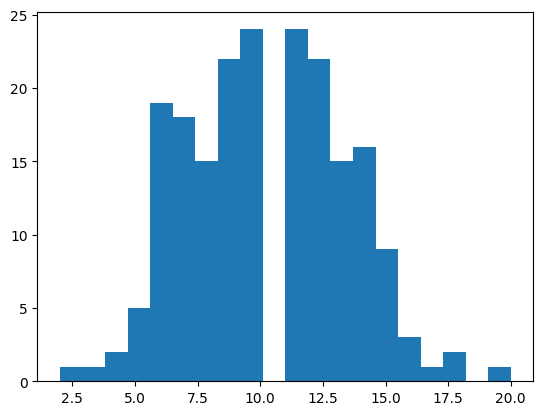

In [40]:
plt.hist(X, bins=20)
plt.show()

In [41]:
print(len(X), np.mean(X), np.std(X))

200 10.195 3.133205227877676


In [42]:
# В задании не сказано про уровень доверия, возьмём стандартные 5%
alpha = 0.05

### Доверительный интервал для распределения Пуассона, очевидно, равен $\left(\frac{\chi^2_{2(n \overline{X}), \alpha / 2}}{2}, \frac{\chi^2_{2(n \overline{X} + 1), 1 - \alpha / 2}}{2}\right)$
### О том, почему это очевидно, рассказывается в книге "Univariate Discrete Distributions" на странице 176 
https://www.google.ru/books/edition/Univariate_Discrete_Distributions/XeKlEAAAQBAJ?hl=ru&gbpv=0

In [43]:
def get_interval(X, alpha):
    mean = np.mean(X)
    count = np.sum(X)
    z1 = stats.chi2.ppf(alpha / 2, count * 2) / 2
    z2 = stats.chi2.ppf(1 - alpha / 2, count * 2 + 2) / 2
    return [z1 / len(X), z2 / len(X)]

In [44]:
conf_int = get_interval(X, alpha)
conf_int

[9.757240949745054, 10.647338749489693]

In [45]:
intervals = []
Theta = np.linspace(1e-3, 20, 201)
for theta in Theta:
    X_theta = np.random.poisson(theta, n)
    intervals.append(get_interval(X_theta, alpha))
intervals = np.array(intervals)
ints_T = np.transpose(intervals)
print(np.mean(ints_T[1] - ints_T[0]), np.mean(ints_T[1] - ints_T[0]) * np.sqrt(n))

nan nan


In [46]:
def draw(Theta, intervals):
    fig = plt.figure(figsize=(16, 7))
    for i in range(len(Theta)):
        plt.plot([Theta[i], Theta[i]], intervals[i], 'b')
    plt.plot([0, 20], [0, 20], 'g')
    plt.xlabel('θ')
    plt.ylabel('Доверительный интервал')
    plt.title('Доверительные интервалы для разных значений θ')
    plt.show()

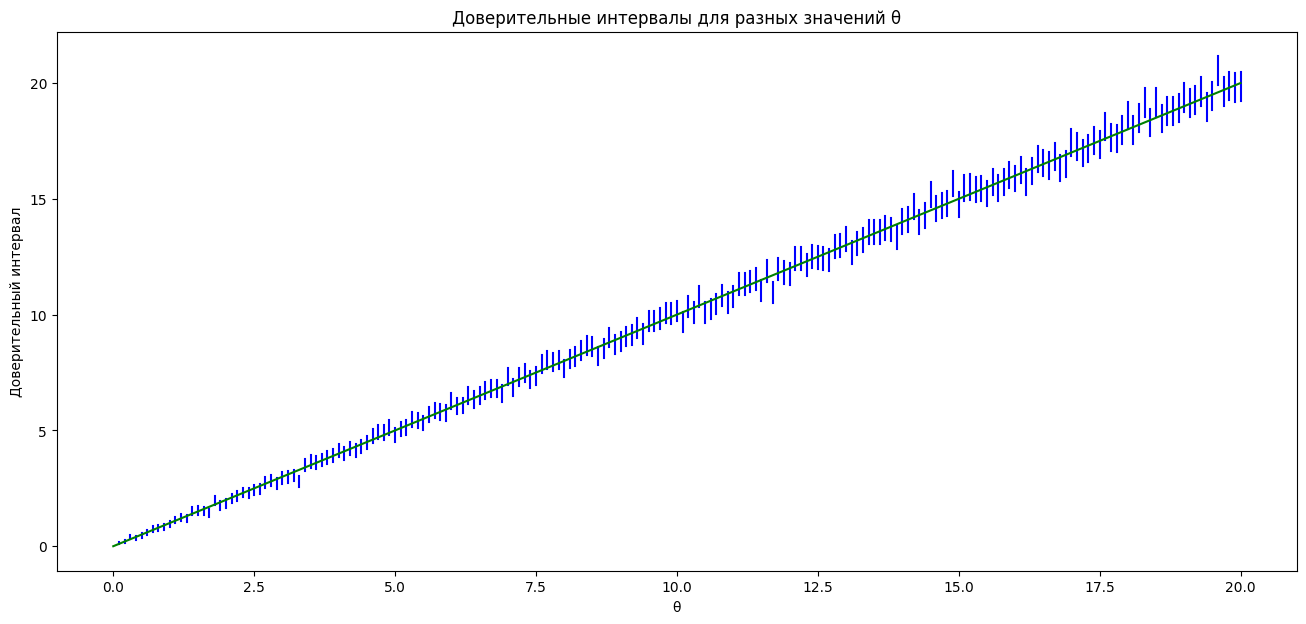

In [47]:
draw(Theta, intervals)

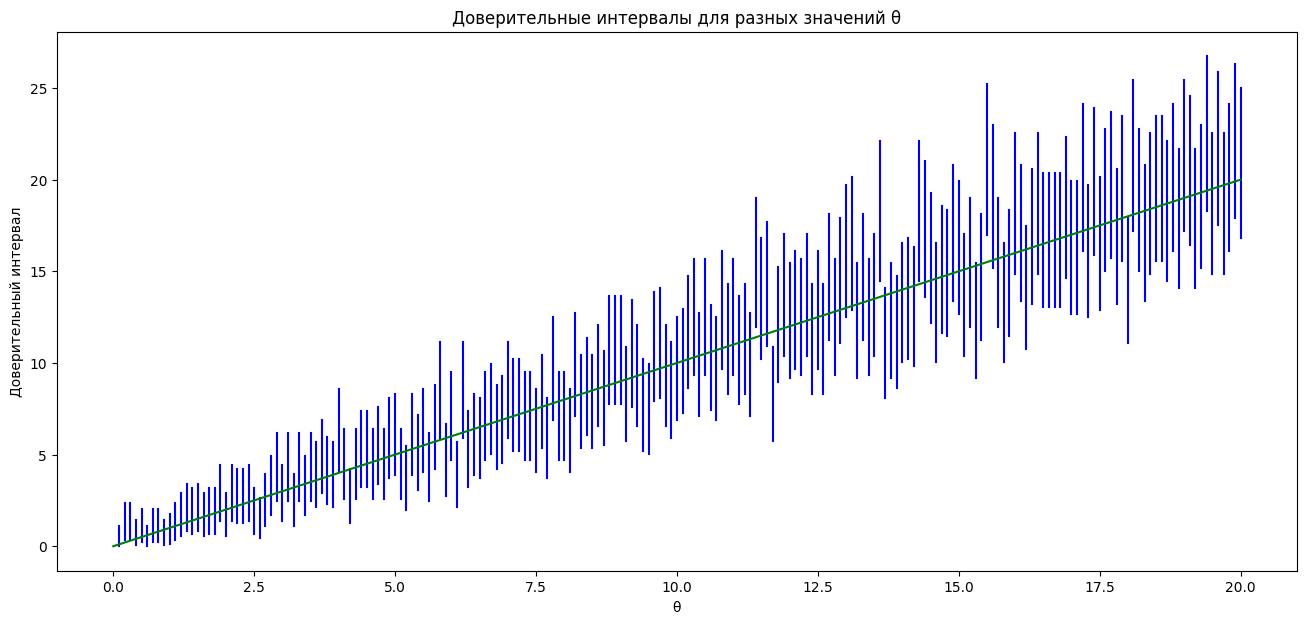

0.9353233830845771


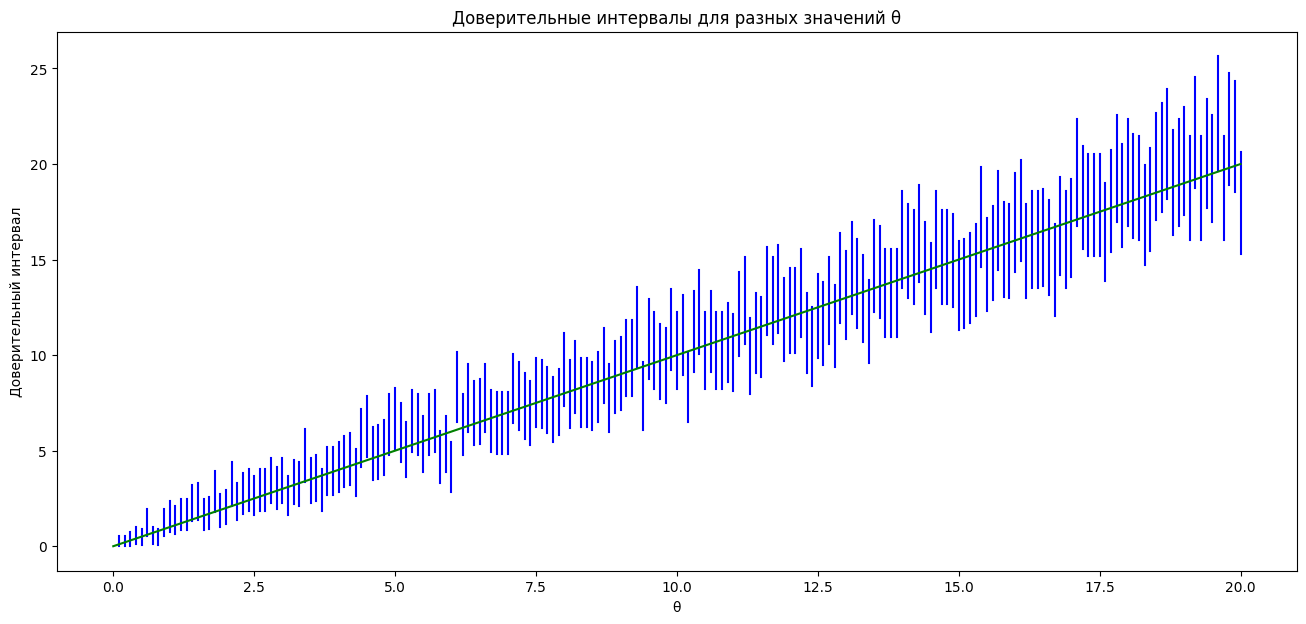

0.9552238805970149


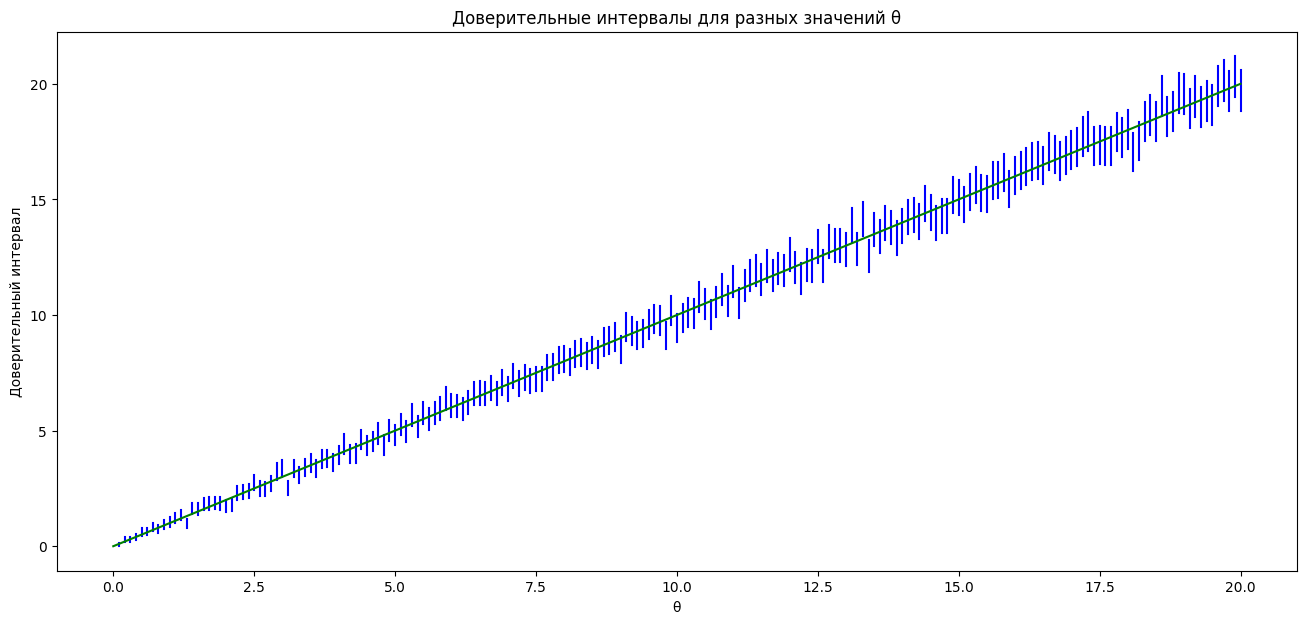

0.945273631840796


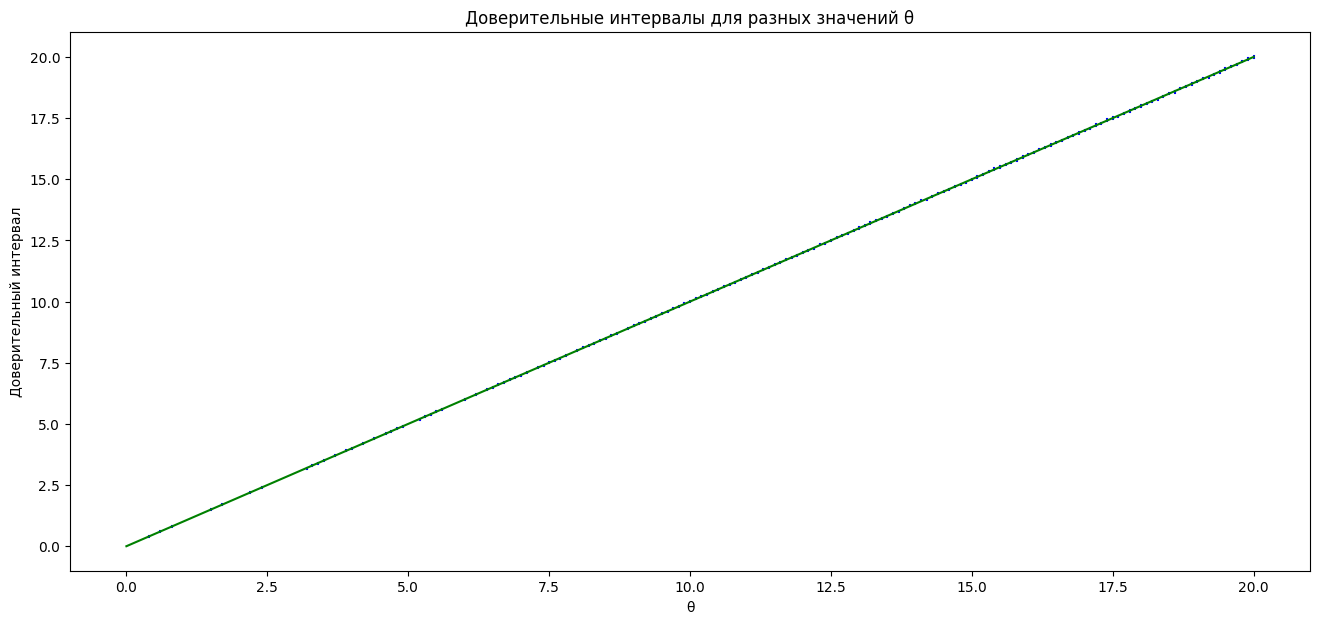

0.9253731343283582


In [48]:
for n in [5, 10, 100, 100000]:
    s = 0
    intervals = []
    Theta = np.linspace(1e-3, 20, 201)
    for theta in Theta:
        X_theta = np.random.poisson(theta, n)
        intervals.append(get_interval(X_theta, alpha))
        s += 1 if intervals[-1][0] < theta and intervals[-1][1] > theta else 0
    draw(Theta, intervals)
    print(s / len(intervals))